In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation

In [2]:
Original = pd.read_csv('../Data/PUMA-1201-2012to2016-5%_Treated.csv')
Original

,HINCP,NP,AGEP,RAC1P,ESR,SEX,WIF,HUPAC,HHT,PUMA,ST
0,5,2,75,1,6,1,1,4,1,1201,24
1,5,2,68,1,6,2,1,4,1,1201,24
2,3,2,64,1,1,2,2,4,1,1201,24
3,3,2,71,1,6,1,2,4,1,1201,24
4,4,3,31,1,1,1,2,1,1,1201,24
...,...,...,...,...,...,...,...,...,...,...,...
5773,2,4,3,9,0,2,2,1,1,1201,24
5774,5,4,51,1,1,2,4,2,1,1201,24
5775,5,4,50,1,1,1,4,2,1,1201,24
5776,5,4,25,1,1,1,4,2,1,1201,24


In [3]:
VAE = pd.read_csv('../Data/reconstruction PUMA==1201.csv')
VAE

,Unnamed: 0,HINCP,NP,AGEP,RAC1P,ESR,SEX,WIF,HUPAC,HHT,PUMA,ST
0,0,4,3,40,2,2,1,3,3,1,1201,24
1,1,5,4,23,1,0,1,3,2,1,1201,24
2,2,4,4,36,2,1,1,3,3,1,1201,24
3,3,4,4,22,2,1,2,3,2,3,1201,24
4,4,5,4,31,3,1,2,3,3,1,1201,24
...,...,...,...,...,...,...,...,...,...,...,...,...
20195,20195,5,4,28,2,1,1,3,2,1,1201,24
20196,20196,4,3,50,2,5,2,2,3,2,1201,24
20197,20197,4,4,30,2,1,2,3,3,1,1201,24
20198,20198,4,3,32,2,1,1,3,3,1,1201,24


In [4]:
GAN = pd.read_csv('../Data/GAN reconstruction PUMA==1201.csv')
GAN

,Unnamed: 0,HINCP,NP,AGEP,RAC1P,ESR,SEX,WIF,HUPAC,HHT,PUMA,ST
0,0,5,3,18,1,3,2,2,4,1,1201,24
1,1,3,5,12,9,0,1,3,4,1,1201,24
2,2,3,5,12,9,0,1,3,4,1,1201,24
3,3,3,5,13,7,0,1,3,4,1,1201,24
4,4,5,3,24,1,6,2,2,4,1,1201,24
...,...,...,...,...,...,...,...,...,...,...,...,...
20195,20195,5,3,6,1,0,2,2,2,1,1201,24
20196,20196,3,5,12,9,0,1,3,4,1,1201,24
20197,20197,3,5,12,9,0,1,3,4,1,1201,24
20198,20198,6,3,33,6,6,2,2,4,2,1201,24


In [5]:
VAE_GAN = pd.read_csv('../Data/VAE-GAN reconstruction PUMA==1201.csv')
VAE_GAN

,Unnamed: 0,HINCP,NP,AGEP,RAC1P,ESR,SEX,WIF,HUPAC,HHT,PUMA,ST
0,0,2,6,14,1,0,1,4,2,2,1201,24
1,1,6,3,56,1,5,1,3,4,1,1201,24
2,2,5,2,46,1,1,1,4,4,1,1201,24
3,3,3,2,40,1,6,2,2,4,1,1201,24
4,4,6,3,49,1,1,1,3,3,1,1201,24
...,...,...,...,...,...,...,...,...,...,...,...,...
20195,20195,6,5,3,1,0,1,2,3,1,1201,24
20196,20196,5,5,17,1,0,2,4,2,1,1201,24
20197,20197,6,2,58,1,1,1,3,4,1,1201,24
20198,20198,4,5,21,2,6,2,2,1,1,1201,24


In [6]:
IPF = pd.read_csv('../Data/IPF All variables.csv')
IPF

,HINCP,NP,AGEP,RAC1P,ESR,SEX,WIF,HUPAC,HHT
0,4,3,31,1,1,1,1,1,1
1,4,3,29,1,6,2,1,1,1
2,4,3,1,1,0,1,1,1,1
3,4,3,31,1,1,1,1,1,1
4,4,3,29,1,6,2,1,1,1
...,...,...,...,...,...,...,...,...,...
174182,2,7,6,1,0,2,1,3,1
174183,2,7,2,1,0,2,1,3,1
174184,5,3,37,1,1,1,2,1,1
174185,5,3,36,6,1,2,2,1,1


In [9]:
del Original['PUMA']
del Original['ST']
Original.loc[Original['AGEP']>=80,'AGEP_MODIFIED']=5
Original.loc[Original['AGEP']<80,'AGEP_MODIFIED']=4
Original.loc[Original['AGEP']<60,'AGEP_MODIFIED']=3
Original.loc[Original['AGEP']<40,'AGEP_MODIFIED']=2
Original.loc[Original['AGEP']<20,'AGEP_MODIFIED']=1
Original['AGEP_MODIFIED']=Original['AGEP_MODIFIED'].astype('int64')
Original['datatype']='Original'
del Original['AGEP']
Original

,HINCP,NP,RAC1P,ESR,SEX,WIF,HUPAC,HHT,AGEP_MODIFIED,datatype
0,5,2,1,6,1,1,4,1,4,Original
1,5,2,1,6,2,1,4,1,4,Original
2,3,2,1,1,2,2,4,1,4,Original
3,3,2,1,6,1,2,4,1,4,Original
4,4,3,1,1,1,2,1,1,2,Original
...,...,...,...,...,...,...,...,...,...,...
5773,2,4,9,0,2,2,1,1,1,Original
5774,5,4,1,1,2,4,2,1,3,Original
5775,5,4,1,1,1,4,2,1,3,Original
5776,5,4,1,1,1,4,2,1,2,Original


In [7]:
del VAE['PUMA']
del VAE['ST']
del VAE['Unnamed: 0']
VAE.loc[VAE['AGEP']>=80,'AGEP_MODIFIED']=5
VAE.loc[VAE['AGEP']<80,'AGEP_MODIFIED']=4
VAE.loc[VAE['AGEP']<60,'AGEP_MODIFIED']=3
VAE.loc[VAE['AGEP']<40,'AGEP_MODIFIED']=2
VAE.loc[VAE['AGEP']<20,'AGEP_MODIFIED']=1
VAE['AGEP_MODIFIED']=VAE['AGEP_MODIFIED'].astype('int64')
VAE['datatype']='VAE'
del VAE['AGEP']
VAE

,HINCP,NP,RAC1P,ESR,SEX,WIF,HUPAC,HHT,AGEP_MODIFIED,datatype
0,4,3,2,2,1,3,3,1,3,VAE
1,5,4,1,0,1,3,2,1,2,VAE
2,4,4,2,1,1,3,3,1,2,VAE
3,4,4,2,1,2,3,2,3,2,VAE
4,5,4,3,1,2,3,3,1,2,VAE
...,...,...,...,...,...,...,...,...,...,...
20195,5,4,2,1,1,3,2,1,2,VAE
20196,4,3,2,5,2,2,3,2,3,VAE
20197,4,4,2,1,2,3,3,1,2,VAE
20198,4,3,2,1,1,3,3,1,2,VAE


In [8]:
del GAN['PUMA']
del GAN['ST']
del GAN['Unnamed: 0']
GAN.loc[GAN['AGEP']>=80,'AGEP_MODIFIED']=5
GAN.loc[GAN['AGEP']<80,'AGEP_MODIFIED']=4
GAN.loc[GAN['AGEP']<60,'AGEP_MODIFIED']=3
GAN.loc[GAN['AGEP']<40,'AGEP_MODIFIED']=2
GAN.loc[GAN['AGEP']<20,'AGEP_MODIFIED']=1
GAN['AGEP_MODIFIED']=GAN['AGEP_MODIFIED'].astype('int64')
GAN['datatype']='GAN'
del GAN['AGEP']
GAN

,HINCP,NP,RAC1P,ESR,SEX,WIF,HUPAC,HHT,AGEP_MODIFIED,datatype
0,5,3,1,3,2,2,4,1,1,GAN
1,3,5,9,0,1,3,4,1,1,GAN
2,3,5,9,0,1,3,4,1,1,GAN
3,3,5,7,0,1,3,4,1,1,GAN
4,5,3,1,6,2,2,4,1,2,GAN
...,...,...,...,...,...,...,...,...,...,...
20195,5,3,1,0,2,2,2,1,1,GAN
20196,3,5,9,0,1,3,4,1,1,GAN
20197,3,5,9,0,1,3,4,1,1,GAN
20198,6,3,6,6,2,2,4,2,2,GAN


In [9]:
del VAE_GAN['PUMA']
del VAE_GAN['ST']
del VAE_GAN['Unnamed: 0']
VAE_GAN.loc[VAE_GAN['AGEP']>=80,'AGEP_MODIFIED']=5
VAE_GAN.loc[VAE_GAN['AGEP']<80,'AGEP_MODIFIED']=4
VAE_GAN.loc[VAE_GAN['AGEP']<60,'AGEP_MODIFIED']=3
VAE_GAN.loc[VAE_GAN['AGEP']<40,'AGEP_MODIFIED']=2
VAE_GAN.loc[VAE_GAN['AGEP']<20,'AGEP_MODIFIED']=1
VAE_GAN['AGEP_MODIFIED']=VAE_GAN['AGEP_MODIFIED'].astype('int64')
VAE_GAN['datatype']='VAE-GAN'
del VAE_GAN['AGEP']
VAE_GAN

,HINCP,NP,RAC1P,ESR,SEX,WIF,HUPAC,HHT,AGEP_MODIFIED,datatype
0,2,6,1,0,1,4,2,2,1,VAE-GAN
1,6,3,1,5,1,3,4,1,3,VAE-GAN
2,5,2,1,1,1,4,4,1,3,VAE-GAN
3,3,2,1,6,2,2,4,1,3,VAE-GAN
4,6,3,1,1,1,3,3,1,3,VAE-GAN
...,...,...,...,...,...,...,...,...,...,...
20195,6,5,1,0,1,2,3,1,1,VAE-GAN
20196,5,5,1,0,2,4,2,1,1,VAE-GAN
20197,6,2,1,1,1,3,4,1,3,VAE-GAN
20198,4,5,2,6,2,2,1,1,2,VAE-GAN


In [8]:
IPF.loc[IPF['AGEP']>=80,'AGEP_MODIFIED']=5
IPF.loc[IPF['AGEP']<80,'AGEP_MODIFIED']=4
IPF.loc[IPF['AGEP']<60,'AGEP_MODIFIED']=3
IPF.loc[IPF['AGEP']<40,'AGEP_MODIFIED']=2
IPF.loc[IPF['AGEP']<20,'AGEP_MODIFIED']=1
IPF['AGEP_MODIFIED']=IPF['AGEP_MODIFIED'].astype('int64')
IPF['datatype']='IPF'
del IPF['AGEP']
IPF

,HINCP,NP,RAC1P,ESR,SEX,WIF,HUPAC,HHT,AGEP_MODIFIED,datatype
0,4,3,1,1,1,1,1,1,2,IPF
1,4,3,1,6,2,1,1,1,2,IPF
2,4,3,1,0,1,1,1,1,1,IPF
3,4,3,1,1,1,1,1,1,2,IPF
4,4,3,1,6,2,1,1,1,2,IPF
...,...,...,...,...,...,...,...,...,...,...
174182,2,7,1,0,2,1,3,1,1,IPF
174183,2,7,1,0,2,1,3,1,1,IPF
174184,5,3,1,1,1,2,1,1,2,IPF
174185,5,3,6,1,2,2,1,1,2,IPF


In [10]:
frame1=[Original, VAE]
result1=pd.concat(frame1)
frame2=[Original, GAN]
result2=pd.concat(frame2)
frame3=[Original,VAE_GAN]
result3=pd.concat(frame3)
frame4=[Original,IPF]
result4=pd.concat(frame4)

D:\Anaconda\envs\MyVAE\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
D:\Anaconda\envs\MyVAE\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
D:\Anaconda\envs\MyVAE\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


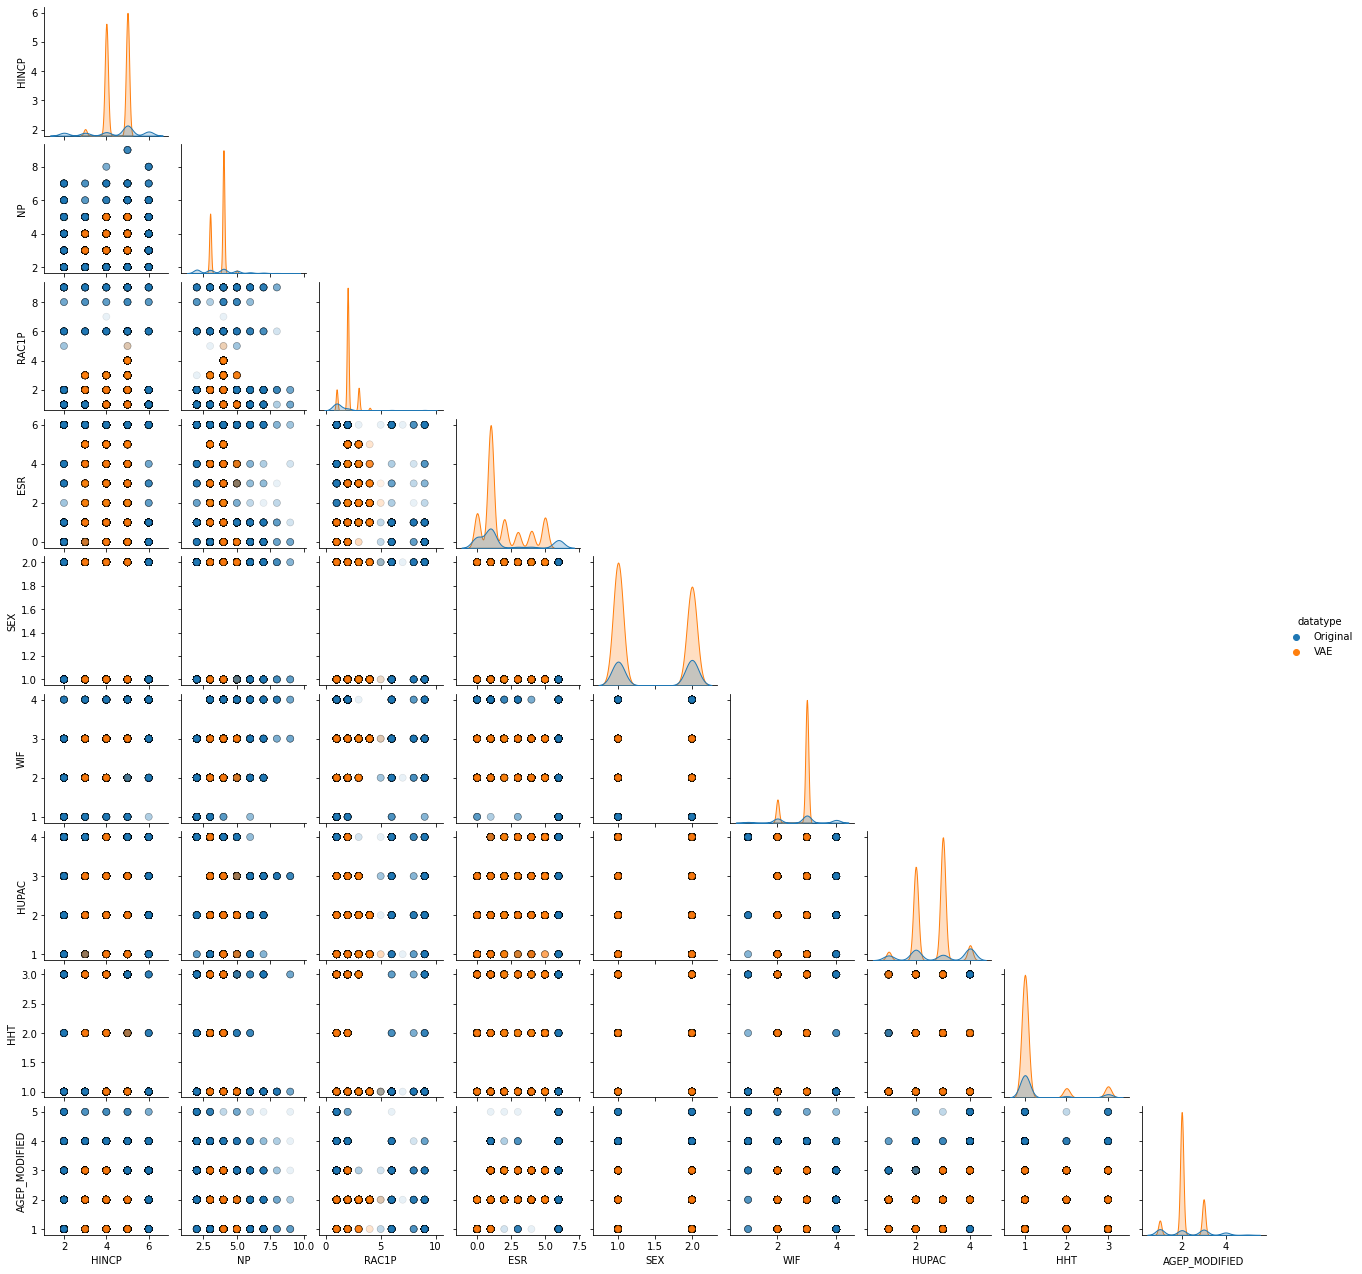

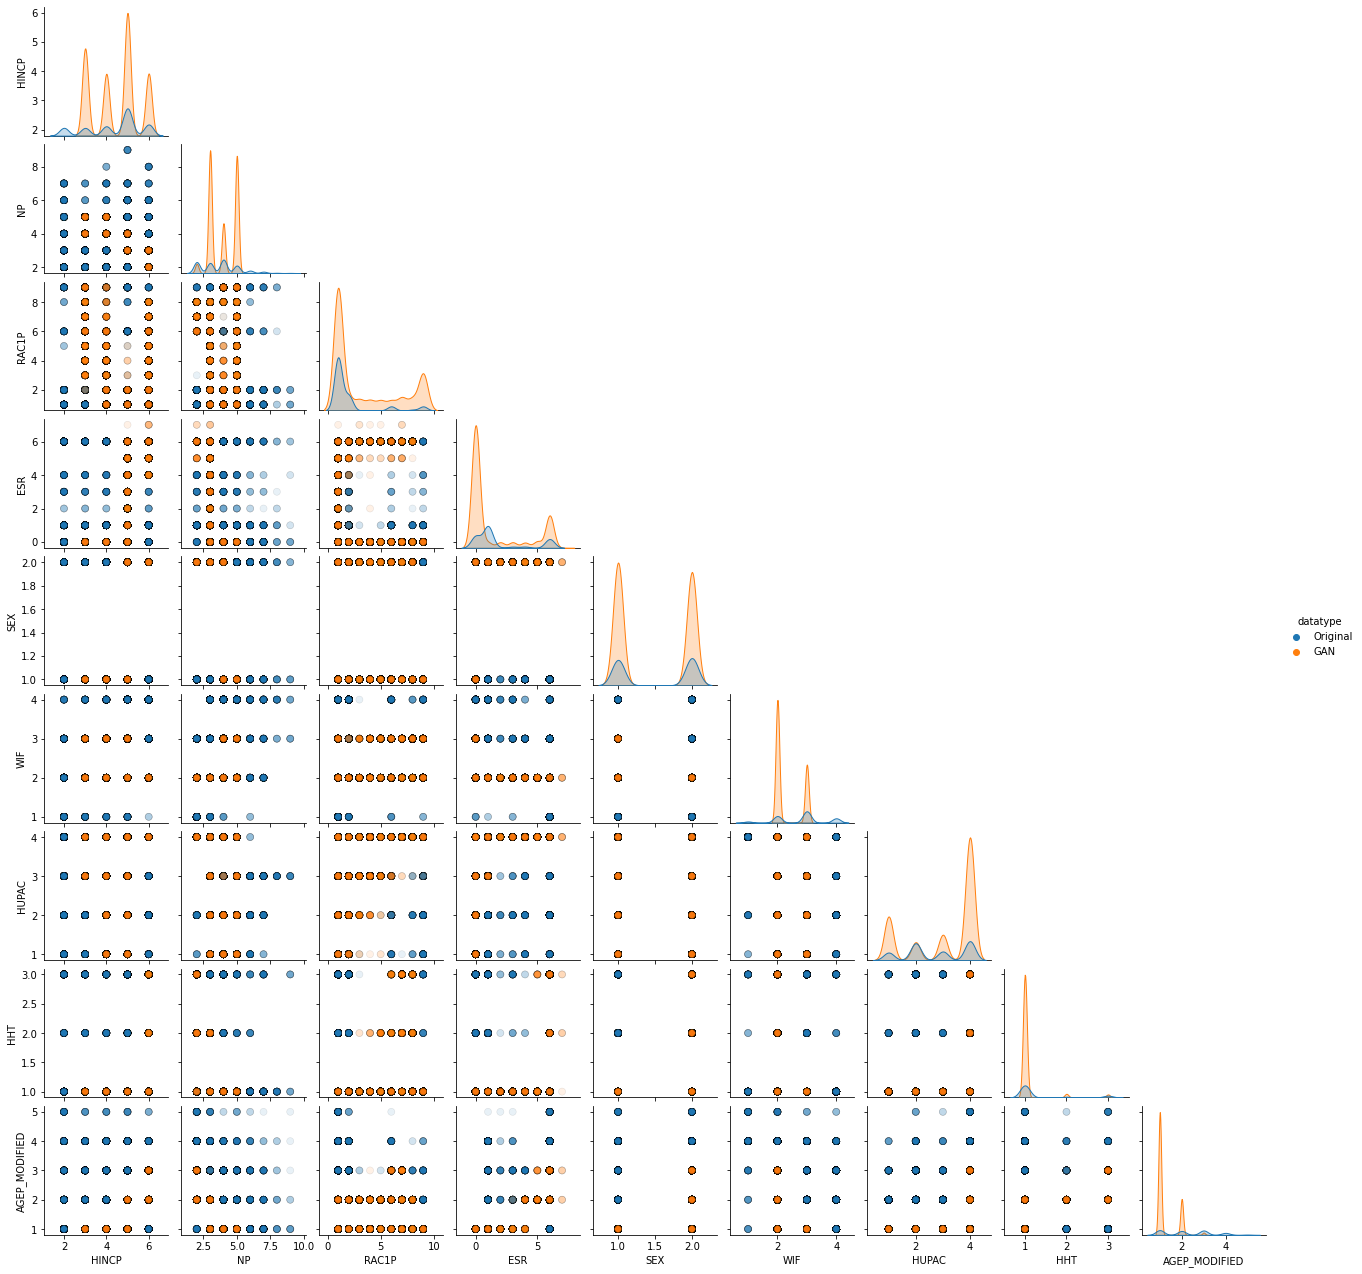

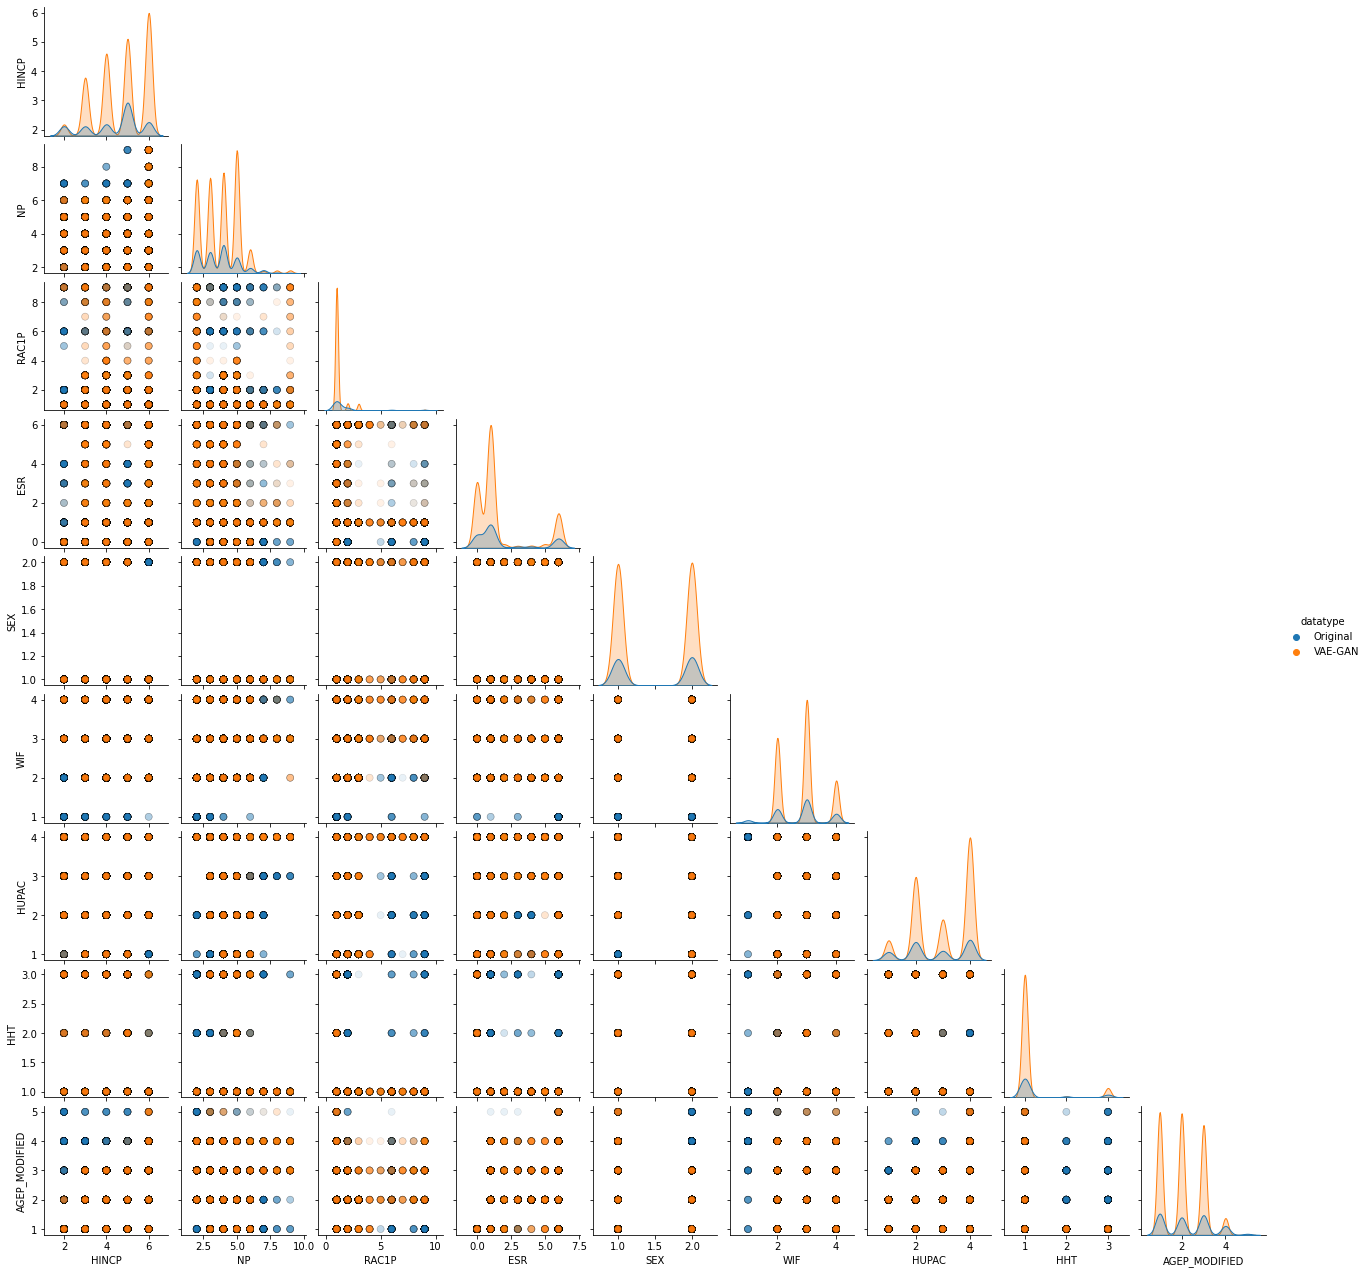

In [15]:

def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)

SP_1=sns.pairplot(result1,hue='datatype',plot_kws = {'alpha': 0.1, 's': 50, 'edgecolor': 'k'},size=2)
SP_1=SP_1.map_upper(hide_current_axis)

SP_2=sns.pairplot(result2,hue='datatype',plot_kws = {'alpha': 0.1, 's': 50, 'edgecolor': 'k'},size=2)
SP_2=SP_2.map_upper(hide_current_axis)

SP_3=sns.pairplot(result3,hue='datatype',plot_kws = {'alpha': 0.1, 's': 50, 'edgecolor': 'k'},size=2)
SP_3=SP_3.map_upper(hide_current_axis)

SP_4=sns.pairplot(result4,hue='datatype',plot_kws = {'alpha': 0.1, 's': 50, 'edgecolor': 'k'},size=2)
SP_4=SP_4.map_upper(hide_current_axis)

In [16]:
SP_1.savefig("Comparison Original VS VAE.png")
SP_2.savefig("Comparison Original VS GAN.png")
SP_3.savefig("Comparison Original VS VAE-GAN.png")
SP_4.savefig("Comparison Original VS IPF.png")